<a href="https://colab.research.google.com/github/Safahzez/Tableau-de-Bord-RH/blob/master/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd # Importation de la bibliothèque pandas pour manipuler les donnée
import matplotlib.pyplot as plt  # Importer la bibliothèque matplotlib pour les graphiques
import seaborn as sns  # Importer la bibliothèque seaborn pour les visualisations avancées et stylisées
import numpy as np # Importation de la bibliothèque NumPy pour le calcul scientifique et la manipulation efficace des tableaux numériques

In [53]:
# Lecture du fichier CSV dans un DataFrame
df=pd.read_csv("/content/diabetes.csv", header=0)
# Affichage des premières lignes du DataFramem
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [77]:
 # Informations sur les colonnes : types, valeurs manquantes, etc..
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   AgeGroup                  768 non-null    object 
 10  BMICategory               768 non-null    object 
dtypes: float64(6), int64(3), object(2)
memory usage: 66.1+ KB


In [55]:
 # Affiche les noms des colonnes du DataFrame sous forme d'un Index
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [56]:
# Vérifier les valeurs manquantes
df.isnull().sum

<bound method DataFrame.sum of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          False    False          False          False    False  False   
1          False    False          False          False    False  False   
2          False    False          False          False    False  False   
3          False    False          False          False    False  False   
4          False    False          False          False    False  False   
..           ...      ...            ...            ...      ...    ...   
763        False    False          False          False    False  False   
764        False    False          False          False    False  False   
765        False    False          False          False    False  False   
766        False    False          False          False    False  False   
767        False    False          False          False    False  False   

     DiabetesPedigreeFunction    Age  Outcome  
0                       False  False    False  
1                       False  False    False  
2                       False  False    False  
3                       False  False    False  
4                       False  False    False  
..                        ...    ...      ...  
763                     False  False    False  
764                     False  False    False  
765                     False  False    False  
766                     False  False    False  
767                     False  False    False  

[768 rows x 9 columns]>

In [57]:

#  Remplacer les valeurs aberrantes (0 qui ne devraient pas être 0)
cols_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in cols_with_zero:
    df[col] = df[col].replace(0, np.nan)  # Remplacer par NaN

#  Imputation des valeurs manquantes par la médiane (plus robuste que la moyenne)
for col in cols_with_zero:
    df[col] = df[col].fillna(df[col].median())

#  Normalisation (optionnel, utile pour modèles ML)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[df.columns] = scaler.fit_transform(df)

# Création de nouvelles variables
# Catégoriser l'âge
def age_category(age):
    if age < 30:
        return "Jeune"
    elif 30 <= age < 50:
        return "Adulte"
    else:
        return "Senior"

df_scaled["AgeGroup"] = df["Age"].apply(age_category)

# Catégoriser l'IMC
def bmi_category(bmi):
    if bmi < 18.5:
        return "Maigre"
    elif 18.5 <= bmi < 25:
        return "Normal"
    elif 25 <= bmi < 30:
        return "Surpoids"
    else:
        return "Obèse"

df_scaled["BMICategory"] = df["BMI"].apply(bmi_category)

# Aperçu
df_scaled.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup,BMICategory
0,0.352941,0.670968,0.489796,0.304348,0.133413,0.314928,0.234415,0.483333,1.0,Senior,Obèse
1,0.058824,0.264516,0.428571,0.239130,0.133413,0.171779,0.116567,0.166667,0.0,Adulte,Surpoids
2,0.470588,0.896774,0.408163,0.239130,0.133413,0.104294,0.253629,0.183333,1.0,Adulte,Normal
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0,Jeune,Surpoids
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0,Adulte,Obèse


In [58]:
# Aperçu global
print(df_scaled.describe())

# Répartition des malades vs non malades
print(df_scaled['Outcome'].value_counts())

# Pourcentage de patients diabétiques
print(df_scaled['Outcome'].value_counts(normalize=True) * 100)


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      0.226180    0.501008       0.493742       0.240305    0.152250   
std       0.198210    0.196376       0.123435       0.095557    0.103826   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       0.058824    0.359677       0.408163       0.195652    0.129207   
50%       0.176471    0.470968       0.489796       0.239130    0.133413   
75%       0.352941    0.620968       0.571429       0.271739    0.136118   
max       1.000000    1.000000       1.000000       1.000000    1.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean     0.291518                  0.168179    0.204015    0.348958  
std      0.140597                  0.141473    0.196004    0.476951  
min      0.000000                  

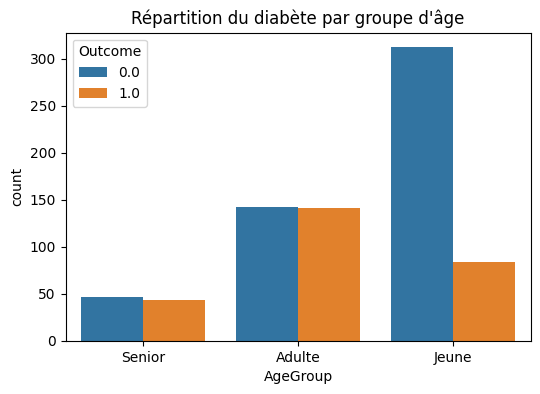

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Répartition par groupe d'âge
plt.figure(figsize=(6,4))
sns.countplot(data=df_scaled, x='AgeGroup', hue='Outcome')
plt.title("Répartition du diabète par groupe d'âge")
plt.show()

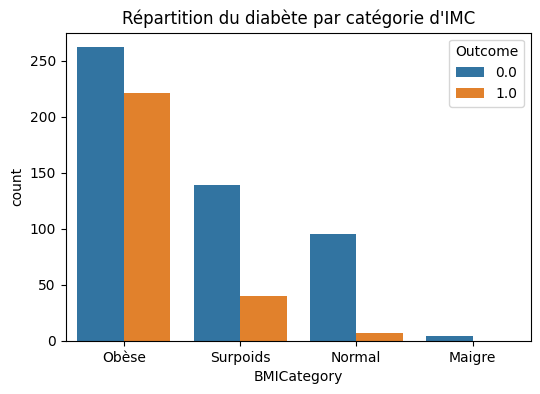

In [60]:
# Répartition par catégorie d'IMC
plt.figure(figsize=(6,4))
sns.countplot(data=df_scaled, x='BMICategory', hue='Outcome')
plt.title("Répartition du diabète par catégorie d'IMC")
plt.show()

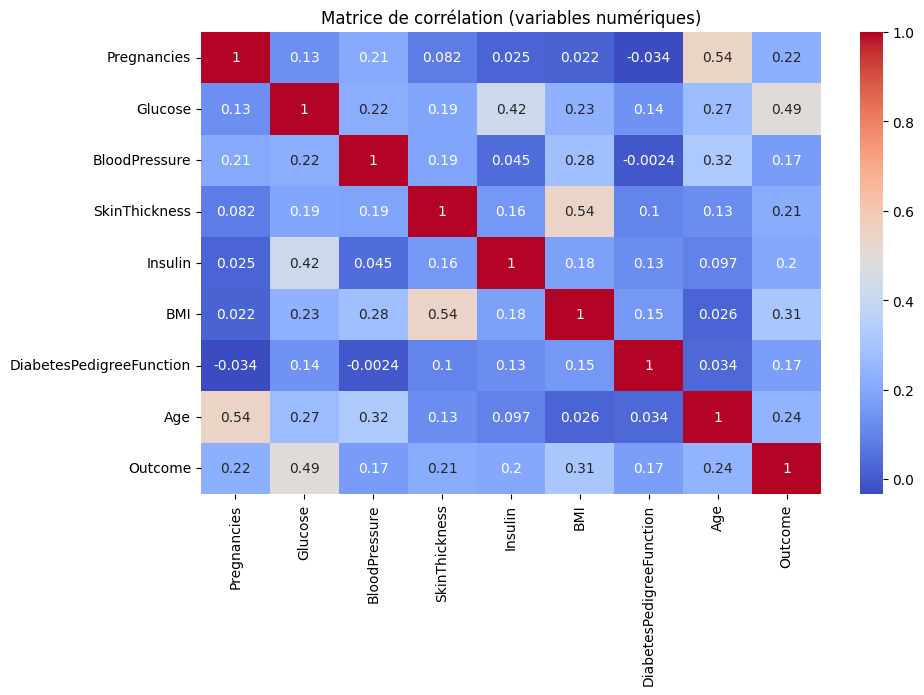

In [61]:
plt.figure(figsize=(10,6))

# Sélection uniquement des colonnes numériques
numeric_df = df_scaled.select_dtypes(include=[np.number])

# Calcul et affichage de la matrice de corrélation
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation (variables numériques)")
plt.show()

In [62]:
# Sélectionner uniquement les colonnes numériques
numeric_cols = df_scaled.select_dtypes(include=[np.number]).columns

# Faire le groupby uniquement sur les colonnes numériques
df_grouped = df_scaled[numeric_cols].groupby(df_scaled['Outcome']).mean()
print(df_grouped)


         Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin  \
Outcome                                                                  
0.0         0.194000  0.430206       0.478776       0.225283  0.136769   
1.0         0.286216  0.633101       0.521665       0.268332  0.181132   

              BMI  DiabetesPedigreeFunction       Age  Outcome  
Outcome                                                         
0.0      0.259419                  0.150185  0.169833      0.0  
1.0      0.351402                  0.201751  0.267786      1.0  


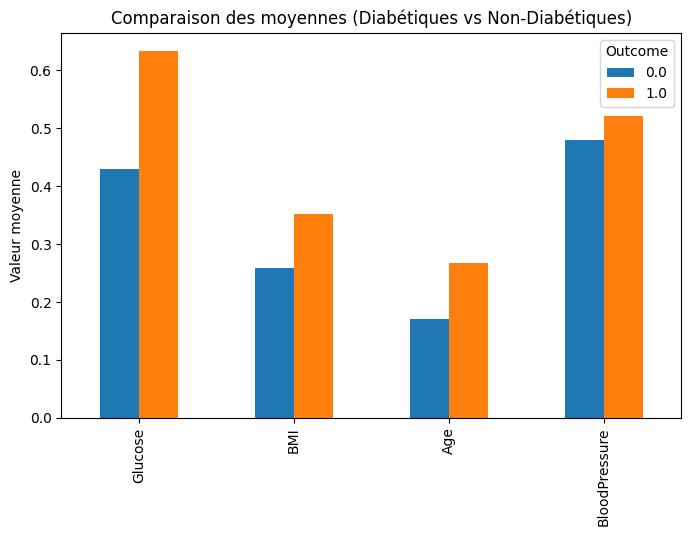

In [63]:
import matplotlib.pyplot as plt

features = ['Glucose', 'BMI', 'Age', 'BloodPressure']
df_grouped[features].T.plot(kind='bar', figsize=(8,5))
plt.title("Comparaison des moyennes (Diabétiques vs Non-Diabétiques)")
plt.ylabel("Valeur moyenne")
plt.show()



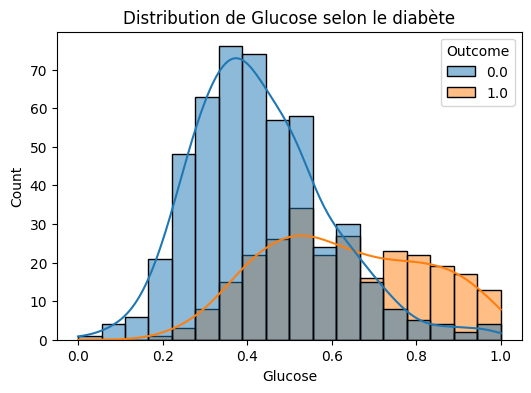

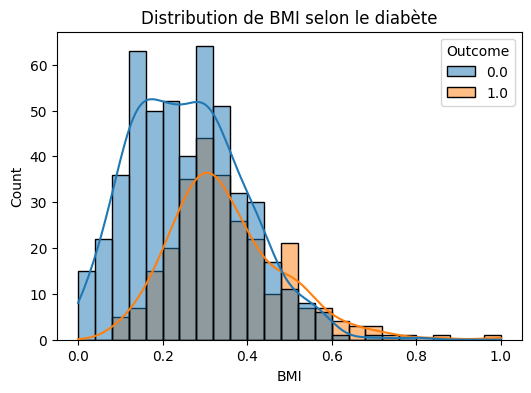

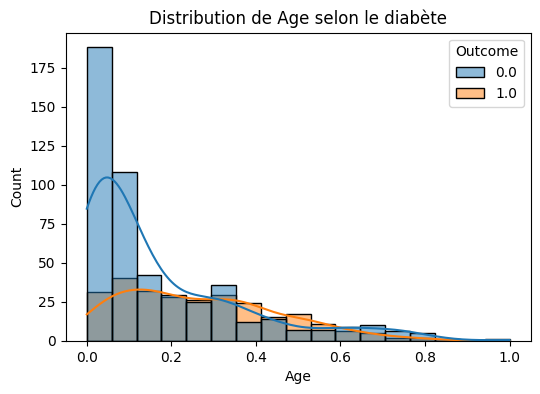

In [64]:
for col in ['Glucose', 'BMI', 'Age']:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df_scaled, x=col, hue='Outcome', kde=True)
    plt.title(f"Distribution de {col} selon le diabète")
    plt.show()


In [88]:

# Encodage des variables catégorielles ---
df_encoded = pd.get_dummies(df, columns=["AgeGroup","BMICategory"], drop_first=True)

# Préparer X et y ---
X = df_encoded.drop("Outcome", axis=1)
y = df_encoded["Outcome"]

# Séparation train/test ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle Random Forest avec hyperparam tuning et classes équilibrées ---
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,
    class_weight="balanced",
    random_state=42
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Évaluation du modèle ---
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7467532467532467
              precision    recall  f1-score   support

           0       0.86      0.73      0.79        99
           1       0.61      0.78      0.69        55

    accuracy                           0.75       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.75      0.75       154



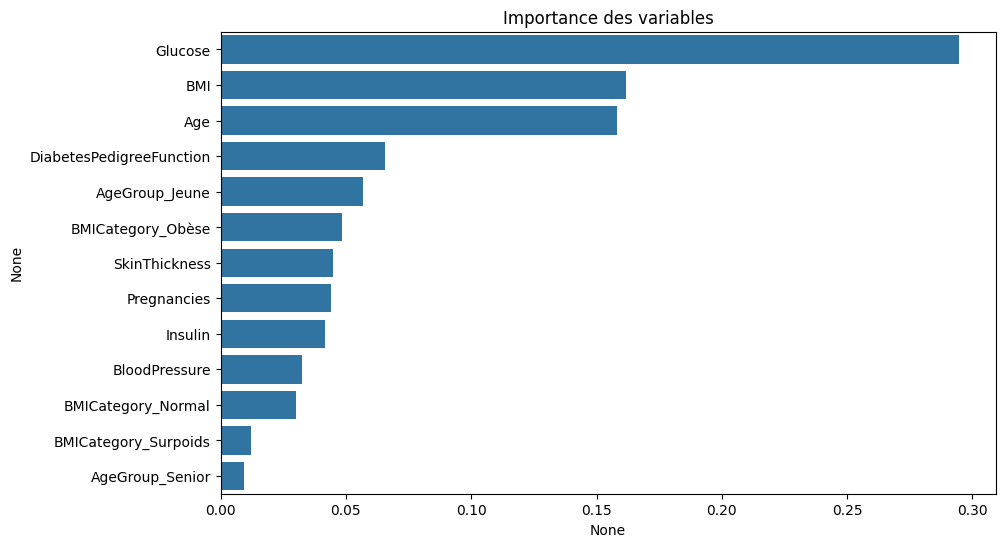

In [89]:

#Visualisation de l’importance des variables ---
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Importance des variables")
plt.show()

In [90]:
from ipywidgets import interact

def show_plot(option):
    plt.figure(figsize=(8,5))

    if option == "Distribution Glucose":
        sns.histplot(df, x="Glucose", hue="Outcome", kde=True)
    elif option == "Distribution BMI":
        sns.histplot(df, x="BMI", hue="Outcome", kde=True)
    elif option == "Comparaison AgeGroup":
        sns.countplot(data=df, x="AgeGroup", hue="Outcome")
    elif option == "Importance des variables":
        sns.barplot(x=feature_importances, y=feature_importances.index)

    plt.show()

interact(show_plot, option=["Distribution Glucose","Distribution BMI","Comparaison AgeGroup","Importance des variables"])


interactive(children=(Dropdown(description='option', options=('Distribution Glucose', 'Distribution BMI', 'Com…

<function __main__.show_plot(option)>

In [92]:
X.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'AgeGroup_Jeune',
       'AgeGroup_Senior', 'BMICategory_Normal', 'BMICategory_Obèse',
       'BMICategory_Surpoids'],
      dtype='object')

In [93]:
# Liste des colonnes du modèle
cols = X.columns

# Exemple d'une personne
data = {
    "Pregnancies": 2,
    "Glucose": 120,
    "BloodPressure": 70,
    "SkinThickness": 20,
    "Insulin": 79,
    "BMI": 28,
    "DiabetesPedigreeFunction": 0.5,
    "Age": 32,
    "AgeGroup_Jeune": 0,
    "AgeGroup_Adulte": 1,
    "AgeGroup_Senior": 0,
    "BMICategory_Maigre": 0,
    "BMICategory_Normal": 0,
    "BMICategory_Surpoids": 1,
    "BMICategory_Obèse": 0
}

# Créer DataFrame avec toutes les colonnes
nouvelle_personne = pd.DataFrame([{col: data.get(col, 0) for col in cols}])

# Prédiction
prediction = model.predict(nouvelle_personne)
print("Prédiction Outcome (0=non diabétique, 1=diabétique):", prediction[0])


Prédiction Outcome (0=non diabétique, 1=diabétique): 0


In [94]:
!pip install ipywidgets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.7 MB/s eta 0:00:00


In [95]:
from ipywidgets import interact, IntSlider, FloatSlider

def predict_dashboard(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age):
    # Déterminer les catégories
    AgeGroup_Jeune = 1 if Age < 30 else 0
    AgeGroup_Adulte = 1 if 30 <= Age < 50 else 0
    AgeGroup_Senior = 1 if Age >= 50 else 0

    BMICategory_Maigre = 1 if BMI < 18.5 else 0
    BMICategory_Normal = 1 if 18.5 <= BMI < 25 else 0
    BMICategory_Surpoids = 1 if 25 <= BMI < 30 else 0
    BMICategory_Obèse = 1 if BMI >= 30 else 0

    data = {
        "Pregnancies": Pregnancies,
        "Glucose": Glucose,
        "BloodPressure": BloodPressure,
        "SkinThickness": SkinThickness,
        "Insulin": Insulin,
        "BMI": BMI,
        "DiabetesPedigreeFunction": DPF,
        "Age": Age,
        "AgeGroup_Jeune": AgeGroup_Jeune,
        "AgeGroup_Adulte": AgeGroup_Adulte,
        "AgeGroup_Senior": AgeGroup_Senior,
        "BMICategory_Maigre": BMICategory_Maigre,
        "BMICategory_Normal": BMICategory_Normal,
        "BMICategory_Surpoids": BMICategory_Surpoids,
        "BMICategory_Obèse": BMICategory_Obèse
    }

    # Créer DataFrame avec toutes les colonnes du modèle
    nouvelle_personne = pd.DataFrame([{col: data.get(col, 0) for col in X.columns}])
    prediction = model.predict(nouvelle_personne)[0]

    print("Prédiction Outcome (0=non diabétique, 1=diabétique):", prediction)

# Créer les sliders
interact(predict_dashboard,
         Pregnancies=IntSlider(min=0,max=15,value=1),
         Glucose=IntSlider(min=50,max=200,value=100),
         BloodPressure=IntSlider(min=30,max=120,value=70),
         SkinThickness=IntSlider(min=5,max=100,value=20),
         Insulin=IntSlider(min=15,max=300,value=79),
         BMI=FloatSlider(min=10,max=50,value=28),
         DPF=FloatSlider(min=0.0,max=2.5,value=0.5),
         Age=IntSlider(min=10,max=90,value=32))


interactive(children=(IntSlider(value=1, description='Pregnancies', max=15), IntSlider(value=100, description=…

<function __main__.predict_dashboard(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age)>